<a href="https://colab.research.google.com/github/Bhanuchanderreddy12345/DAB103Grp12/blob/main/Copy_of_stockMarketAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**NIFTY 50 Index stock analysis**

In [29]:
from google.colab import drive
drive.mount ('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
project_directory = '/content/drive/MyDrive/Learnings/PYTHON-DEMO/Stockmarket/'

nifty50EicherMotors = pd.read_csv(project_directory+'/EICHERMOT.csv')
nifty50Reliance = pd.read_csv(project_directory+'/RELIANCE.csv')
nifty50AdaniPorts = pd.read_csv(project_directory+'/ADANIPORTS.csv')
nifty50BharatiAirtel = pd.read_csv(project_directory+'/BHARTIARTL.csv')
nifty50BajajAuto = pd.read_csv(project_directory+'/BAJAJ-AUTO.csv')
nifty50Titan = pd.read_csv(project_directory+'/TITAN.csv')


In [31]:
stockList = ['RELIANCE.csv','BHARTIARTL.csv', 'ADANIPORTS.csv'] #all stocks in list
stockMarket = pd.DataFrame() # Create all stocks data frame 
for stocks in stockList:
    files = pd.read_csv(project_directory+'/'+stocks) #iterate all stocks one by one
    stockMarket = pd.concat([stockMarket,files]) #concat the list with help of concat method
stockMarket.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN


**Removing null values**

In [32]:
stockMarket.isna().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                6034
Deliverable Volume     530
%Deliverble            530
dtype: int64

In [33]:
stockMarket.drop(['Trades','Deliverable Volume','%Deliverble'],axis=1,inplace=True)

In [34]:
stockMarket.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14


**Converting the Date column in the DataFrame stockMarket into datetime format**


In [35]:
stockMarket.dtypes

Date           object
Symbol         object
Series         object
Prev Close    float64
Open          float64
High          float64
Low           float64
Last          float64
Close         float64
VWAP          float64
Volume          int64
Turnover      float64
dtype: object

In [36]:
stockMarket['Date'] = pd.to_datetime(stockMarket['Date'])

In [37]:
stockMarket.dtypes

Date          datetime64[ns]
Symbol                object
Series                object
Prev Close           float64
Open                 float64
High                 float64
Low                  float64
Last                 float64
Close                float64
VWAP                 float64
Volume                 int64
Turnover             float64
dtype: object

**Calculating Return of Investments of three nifty 50 stocks from 2020 to 2021**

{'ADANIPORTS': 93.31391500066198, 'RELIANCE': 32.12109167991522, 'BHARTIARTL': 18.409441870725786}


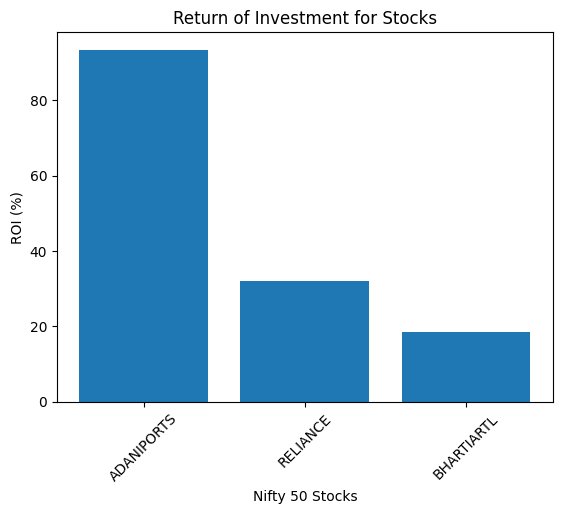

In [38]:
# Set the start and end date
start_date = '2020-01-01'
end_date = '2021-12-31'

# Create a list of unique stocks in the stockList
unique_stocks = list(set([stock[:-4] for stock in stockList]))

# Create a dictionary to store the ROI for each stock
roi_dict = {}

# Calculate ROI for each stock and store in the dictionary
for stock in unique_stocks:
    data = stockMarket[stockMarket['Symbol'] == stock]
    data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]
    initial_price = data['Close'].iloc[0]
    final_price = data['Close'].iloc[-1]
    roi = (final_price - initial_price) / initial_price * 100
    roi_dict[stock] = roi
    
print(roi_dict)

# Plot the ROI for each stock
plt.bar(roi_dict.keys(), roi_dict.values())
plt.xticks(rotation=45)
plt.title('Return of Investment for Stocks')
plt.xlabel('Nifty 50 Stocks')
plt.ylabel('ROI (%)')
plt.show()


In [39]:
stockList

['RELIANCE.csv', 'BHARTIARTL.csv', 'ADANIPORTS.csv']

**Volume trades of 3 largest Nifty stocks**

In [40]:
stockMarket2 = stockMarket.copy()
stockMarket2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13402 entries, 0 to 3321
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        13402 non-null  datetime64[ns]
 1   Symbol      13402 non-null  object        
 2   Series      13402 non-null  object        
 3   Prev Close  13402 non-null  float64       
 4   Open        13402 non-null  float64       
 5   High        13402 non-null  float64       
 6   Low         13402 non-null  float64       
 7   Last        13402 non-null  float64       
 8   Close       13402 non-null  float64       
 9   VWAP        13402 non-null  float64       
 10  Volume      13402 non-null  int64         
 11  Turnover    13402 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(2)
memory usage: 1.3+ MB


In [41]:
# Renaming the Date column in the dataFrame stockMarket2 to Year
stockMarket2.rename(columns={'Date':'Year'},inplace=True)

In [42]:
stockMarket2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13402 entries, 0 to 3321
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Year        13402 non-null  datetime64[ns]
 1   Symbol      13402 non-null  object        
 2   Series      13402 non-null  object        
 3   Prev Close  13402 non-null  float64       
 4   Open        13402 non-null  float64       
 5   High        13402 non-null  float64       
 6   Low         13402 non-null  float64       
 7   Last        13402 non-null  float64       
 8   Close       13402 non-null  float64       
 9   VWAP        13402 non-null  float64       
 10  Volume      13402 non-null  int64         
 11  Turnover    13402 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(2)
memory usage: 1.3+ MB


In [43]:
stockList2 = stockMarket2['Symbol'].unique()
stockList2

array(['RELIANCE', 'BHARTI', 'BHARTIARTL', 'MUNDRAPORT', 'ADANIPORTS'],
      dtype=object)

In [44]:
for volume in stockList2:
    df = stockMarket2[stockMarket2['Symbol']==volume]
    fig = px.line(df, x='Year',y='Volume',title=volume)
    fig.show()

**Open, High, Low and Close Price of three stocks of Nifty 50**

In [45]:
nifty50Reliance['Date'] = pd.to_datetime(nifty50Reliance['Date'])
nifty50EicherMotors['Date'] = pd.to_datetime(nifty50EicherMotors['Date'])
nifty50Titan['Date'] = pd.to_datetime(nifty50Titan['Date'])

In [57]:
df1 = nifty50BajajAuto
fig = go.Figure(data=[go.Candlestick(x=df1['Date'],
                                    open=df1['Open'],
                                    high=df1['High'],
                                    low=df1['Low'],
                                    close=df1['Close'],)])
fig.update_xaxes(rangeslider_visible=False)
fig.update_layout(title="Candlestick Chart of Open, High, Low and Close Price for Nifty50 Bajaj Auto stock")
fig.show()

In [47]:
df2 = nifty50BharatiAirtel
fig = go.Figure(data=[go.Candlestick(x=df2['Date'],
                                    open=df2['Open'],
                                    high=df2['High'],
                                    low=df2['Low'],
                                    close=df2['Close'],)])
fig.update_xaxes(rangeslider_visible=False)
fig.update_layout(title="Candlestick Chart of Open, High, Low and Close Price for Nifty50 Bharati Airtel Auto stock")

In [48]:
df3 = nifty50AdaniPorts
fig = go.Figure(data=[go.Candlestick(x=df3['Date'],
                                    open=df3['Open'],
                                    high=df3['High'],
                                    low=df3['Low'],
                                    close=df3['Close'],)])
fig.update_xaxes(rangeslider_visible=False)
fig.update_layout(title="Candlestick Chart of Open, High, Low and Close Price for Nifty50 Adani ports stock")

**Delivery volume and Intra day volumes trades in three Nifty stocks**


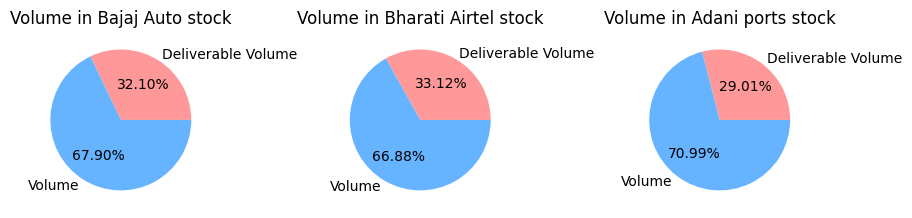

In [49]:
# Define colors for the pie charts
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Define pie chart variables and values for each stock
piechart_vars = ['Deliverable Volume','Volume']
piechart_values1 = [df1['Deliverable Volume'].sum(), df1['Volume'].sum()]
piechart_values2 = [df2['Deliverable Volume'].sum(), df2['Volume'].sum()]
piechart_values3 = [df3['Deliverable Volume'].sum(), df3['Volume'].sum()]

# Create subplots with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# Plot the first pie chart in the first subplot
axs[0].pie(piechart_values1, labels=piechart_vars, autopct="%1.2f%%", colors=colors)
axs[0].set_title('Volume in Bajaj Auto stock')

# Plot the second pie chart in the second subplot
axs[1].pie(piechart_values2, labels=piechart_vars, autopct="%1.2f%%", colors=colors)
axs[1].set_title('Volume in Bharati Airtel stock')

# Plot the third pie chart in the third subplot
axs[2].pie(piechart_values3, labels=piechart_vars, autopct="%1.2f%%", colors=colors)
axs[2].set_title('Volume in Adani ports stock')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.7)

# Show the plot
plt.show()


Ten High prices of three Nifty 50 stocks

In [50]:
high_10_price_df1 = df1.sort_values(by='High', ascending=False).head(10)
high_10_price_df2 = df2.sort_values(by='High', ascending=False).head(10)
high_10_price_df3 = df3.sort_values(by='High', ascending=False).head(10)

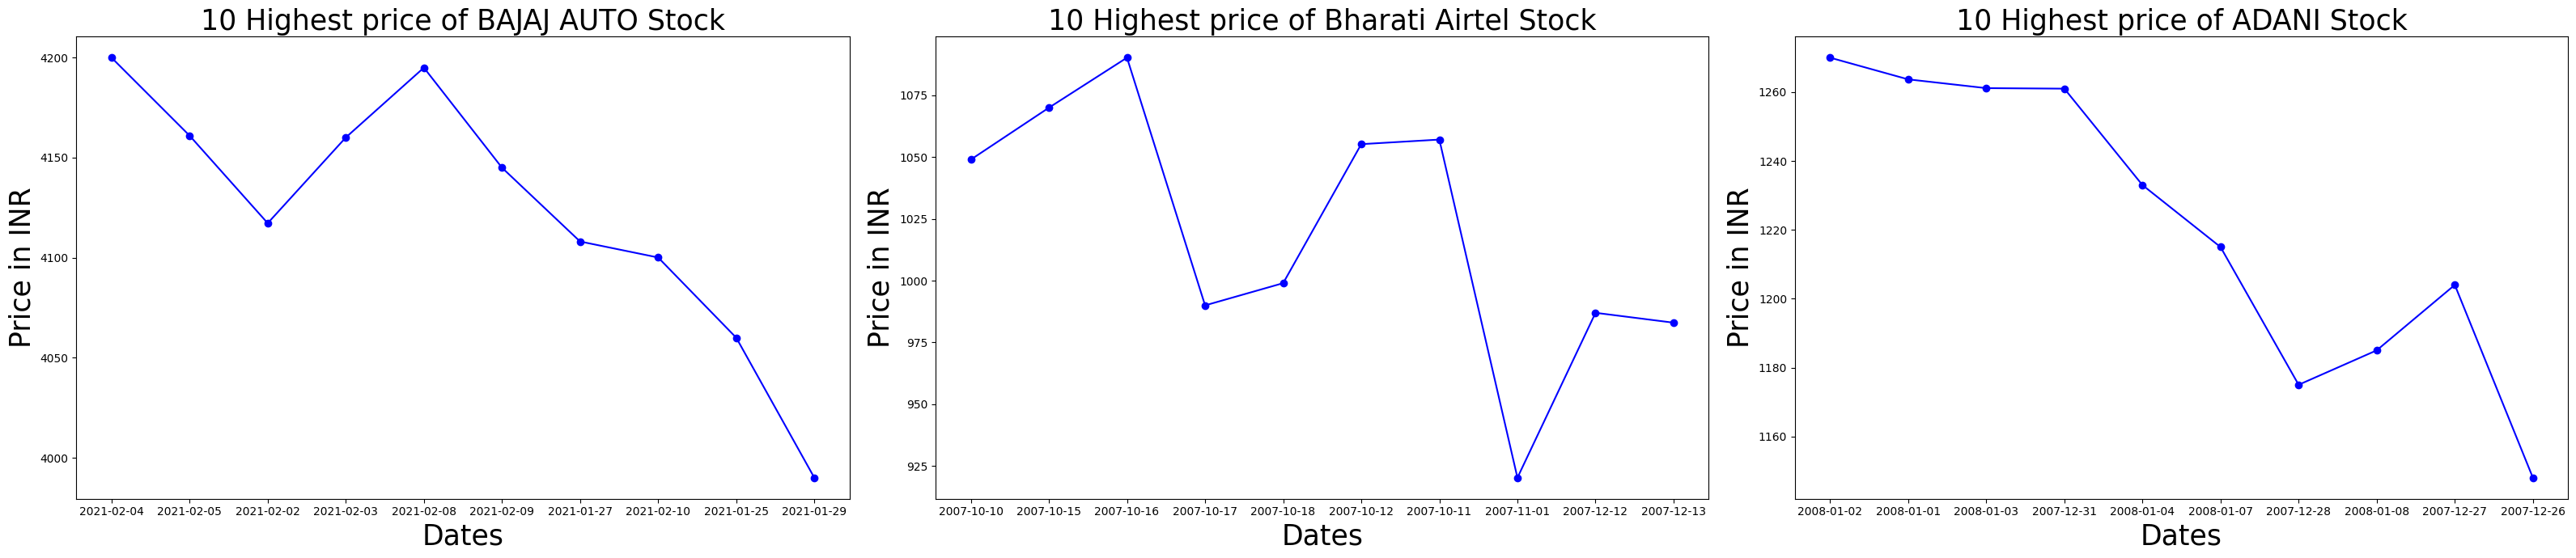

In [51]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(32, 7))

axs[0].plot(high_10_price_df1.Date, high_10_price_df1.Low,'o-b')
axs[0].set_xlabel('Dates', size=25)
axs[0].set_ylabel('Price in INR', size=25)
axs[0].set_title('10 Highest price of BAJAJ AUTO Stock', size=25)

axs[1].plot(high_10_price_df2.Date, high_10_price_df2.Low,'o-b')
axs[1].set_xlabel('Dates', size=25)
axs[1].set_ylabel('Price in INR', size=25)
axs[1].set_title('10 Highest price of Bharati Airtel Stock', size=25)

axs[2].plot(high_10_price_df3.Date, high_10_price_df3.Low,'o-b')
axs[2].set_xlabel('Dates', size=25)
axs[2].set_ylabel('Price in INR', size=25)
axs[2].set_title('10 Highest price of ADANI Stock', size=25)

plt.tight_layout()
plt.show()

**Ten Low prices of three Nifty 50 stocks**

In [52]:
low_10_price_df1 = df1.sort_values(by='Low', ascending=True).head(10)
low_10_price_df2 = df2.sort_values(by='Low', ascending=True).head(10)
low_10_price_df3 = df3.sort_values(by='Low', ascending=True).head(10)

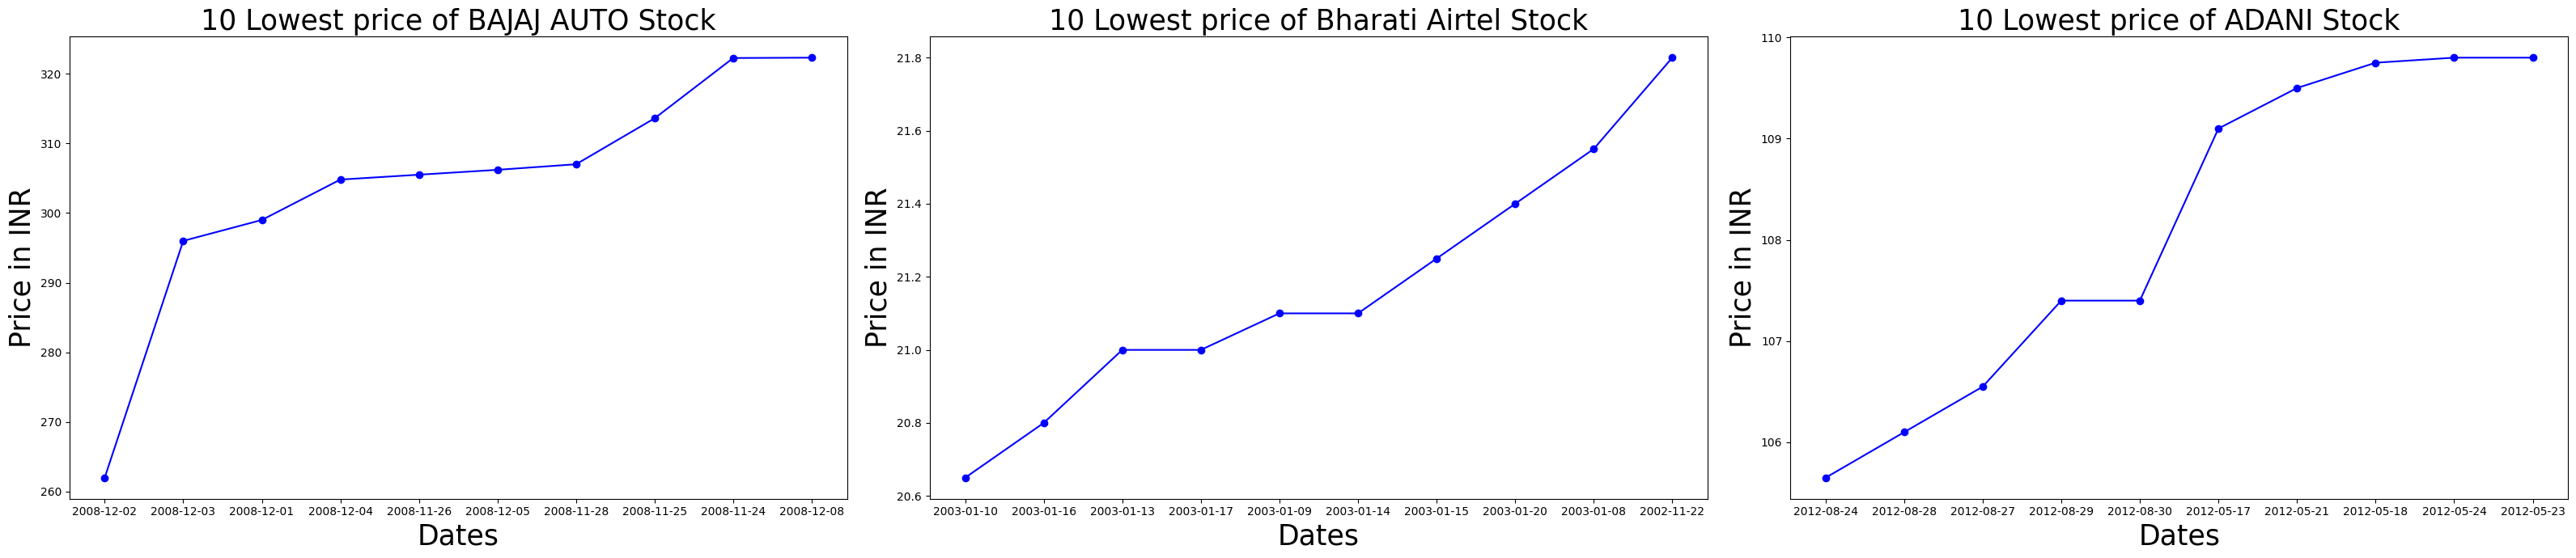

In [53]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(32, 7))

axs[0].plot(low_10_price_df1.Date, low_10_price_df1.Low,'o-b')
axs[0].set_xlabel('Dates', size=25)
axs[0].set_ylabel('Price in INR', size=25)
axs[0].set_title('10 Lowest price of BAJAJ AUTO Stock', size=25)

axs[1].plot(low_10_price_df2.Date, low_10_price_df2.Low,'o-b')
axs[1].set_xlabel('Dates', size=25)
axs[1].set_ylabel('Price in INR', size=25)
axs[1].set_title('10 Lowest price of Bharati Airtel Stock', size=25)

axs[2].plot(low_10_price_df3.Date, low_10_price_df3.Low,'o-b')
axs[2].set_xlabel('Dates', size=25)
axs[2].set_ylabel('Price in INR', size=25)
axs[2].set_title('10 Lowest price of ADANI Stock', size=25)

plt.tight_layout()
plt.show()